In [1]:
#Importing Libraries
from nsepy import get_history
from datetime import date, timedelta
from nsepy import get_index_pe_history

from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#TICKER NAME
ticker = "MCDOWELL-N"

#TIME PERIOD, 15 days in this case
end_day = date.today()
start_day = end_day - timedelta(15)


In [3]:
#Fetch ticker data from nsepy
df = get_history(symbol=ticker, start=start_day, end=end_day)
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-03-23,MCDOWELL-N,EQ,517.15,485.00,489.70,445.80,449.85,448.10,455.89,1548756,7.060589e+13,29657,877592,0.5666
2020-03-24,MCDOWELL-N,EQ,448.10,443.65,479.90,443.65,452.70,451.70,465.04,2198012,1.022166e+14,56023,1288373,0.5862
2020-03-25,MCDOWELL-N,EQ,451.70,450.85,518.95,442.65,467.30,465.55,473.82,5317306,2.519464e+14,91917,3204406,0.6026
2020-03-26,MCDOWELL-N,EQ,465.55,476.00,501.00,463.55,484.20,490.65,490.30,2963377,1.452956e+14,101617,1072235,0.3618
2020-03-27,MCDOWELL-N,EQ,490.65,504.00,506.00,467.00,470.85,470.40,485.79,1360538,6.609368e+13,52124,469644,0.3452
2020-03-30,MCDOWELL-N,EQ,470.40,465.00,494.80,459.95,465.00,467.30,477.80,2142061,1.023467e+14,57690,872866,0.4075
2020-03-31,MCDOWELL-N,EQ,467.30,478.00,493.45,471.00,484.60,484.60,480.58,1847553,8.878910e+13,50134,851312,0.4608
2020-04-01,MCDOWELL-N,EQ,484.60,489.00,503.80,458.40,466.00,462.85,477.51,2390621,1.141548e+14,66750,1084835,0.4538
2020-04-03,MCDOWELL-N,EQ,462.85,465.00,490.00,463.20,471.00,465.80,476.73,2828163,1.348261e+14,77073,1227788,0.4341


In [4]:
#Data preparation for OHLC Candlesticks
data=df[['Open', 'High', 'Low', 'Close', 'Volume']]
#print(data)
data.index.name = 'Date'
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-23,485.00,489.70,445.80,448.10,1548756
2020-03-24,443.65,479.90,443.65,451.70,2198012
2020-03-25,450.85,518.95,442.65,465.55,5317306
2020-03-26,476.00,501.00,463.55,490.65,2963377
2020-03-27,504.00,506.00,467.00,470.40,1360538
2020-03-30,465.00,494.80,459.95,467.30,2142061
2020-03-31,478.00,493.45,471.00,484.60,1847553
2020-04-01,489.00,503.80,458.40,462.85,2390621
2020-04-03,465.00,490.00,463.20,465.80,2828163


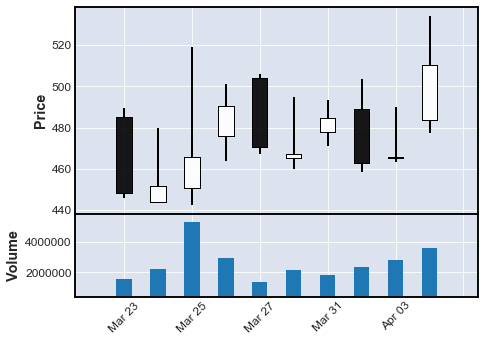

In [5]:
#mplfinance
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
data.index = pd.to_datetime(data.index)
mpf.plot(data, type='candle', volume=True)